In [1]:
# Class path
#Importing Librariespip
import os
import shutil
import tensorflow as tf
from tensorflow.python import keras

In [ ]:
import matplotlib.pyplot as plt
import os

# Replace 'animals_path' with the actual path to your data directory
animals_path = "./animal_dataset"

# Create lists to store animal class labels and counts
animal_labels = []
animal_counts = []

# Populate the lists with data
for o in os.listdir(animals_path):
    animal_labels.append(o)
    animal_counts.append(len(os.listdir(os.path.join(animals_path, o))))

# Create a bar plot to display the distribution
plt.figure(figsize=(10, 6))
plt.bar(animal_labels, animal_counts)
plt.title("Animals Distribution")
plt.xlabel("Animal Class")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()


In [6]:
import math 
import re 
import sys
import shutil

train_val_test_ratio= (0.7,0.1,0.2)
test_folder = 'test/'
train_folder ='train/'
val_folder = 'val/'
file_names = os.listdir(animals_path)
# Remove existing folders if they exist 
for folder in [test_folder,train_folder,val_folder]:
    if os.path.exists(folder) and os.path.exists(folder):
        shutil.rmtree(folder)

# Remake category folders in both Train and Test Folders

for category in file_names:
    os.makedirs(test_folder+category)
    os.makedirs(train_folder+category)
    os.makedirs(val_folder+category)


In [7]:
import random  
#Split Data by Train Ratio and copy files to correct directory 
for idx, category in enumerate(file_names):
    file_list = os.listdir(animals_path + '/' + category)
    random.shuffle(file_list)
    train_ratio = math.floor(len(file_list) * train_val_test_ratio[0])
    val_ratio = math.floor(len(file_list) * train_val_test_ratio[1])
    train_list = file_list[:train_ratio]
    val_list = file_list[train_ratio:train_ratio + val_ratio]
    test_list = file_list[train_ratio + val_ratio:]
    
    for i, file in enumerate(train_list):
        shutil.copy(animals_path + '/' + category + '/' + file, train_folder + '/' + category + '/' + file)
        
    sys.stdout.write('Moving %d train images to category folder %s' % (len(train_list), category)) 
    sys.stdout.write('\n')
    
    for i, file in enumerate(val_list):
        shutil.copy(animals_path + '/' + category + '/' + file, val_folder + '/' + category + '/' + file)
        
    sys.stdout.write('Moving %d validation images to category folder %s' % (len(val_list), category)) 
    sys.stdout.write('\n')
    
    for i, file in enumerate(test_list):
        shutil.copy(animals_path + '/' + category + '/' + file, test_folder + '/' + category + '/' + file)
        
    sys.stdout.write('Moving %d test images to category folder %s' % (len(test_list), category)) 
    sys.stdout.write('\n')
    
print("Done")


Moving 2226 train images to category folder bear
Moving 318 validation images to category folder bear
Moving 636 test images to category folder bear
Moving 5983 train images to category folder deer
Moving 854 validation images to category folder deer
Moving 1711 test images to category folder deer
Moving 4733 train images to category folder fox
Moving 676 validation images to category folder fox
Moving 1353 test images to category folder fox
Moving 3102 train images to category folder wild boar
Moving 443 validation images to category folder wild boar
Moving 887 test images to category folder wild boar
Done


In [9]:
import random
import numpy as np
from keras.preprocessing.image import ImageDataGenerator ,array_to_img,img_to_array,load_img
# importing the library for data augmentation
def data_augment(data_dir):
    list_of_images = os.listdir(data_dir)

    datagen = ImageDataGenerator(
        zoom_range=0.5,
        horizontal_flip=True,
        fill_mode="nearest"
    )

    for img_name in list_of_images:
        tmp_img_name = os.path.join(data_dir, img_name)

        try:
            img = load_img(tmp_img_name)
            img = img_to_array(img)
            img = img.reshape((1,) + img.shape)
            #The flow function of this object generates batches of augmented data based on the provided parameters.
            batch = datagen.flow(
                img,
                batch_size=1, #processing one image at a time for augmentation.
                seed=21,
                save_to_dir=data_dir,
                save_prefix=img_name.split(".JPG")[0] + "augmented",
                save_format="JPG"
            )
            batch.next() # generates the augmented version of the current image within the loop.

        except Exception as e:
            print(f"Error processing image {img_name}: {str(e)}")


In [10]:
classes_to_augment = [
    "bear", "wild boar"
]
for class_name in classes_to_augment:
    print("Augmentation process happening:", class_name)
    data_dir= os.path.join(train_folder,class_name)
    data_augment(data_dir)
    
    

Augmentation process happening: bear
Augmentation process happening: wild boar
Error processing image puertorico_29_puertorico_29_20150121_081635_img_0666.jpg.jpg: Unable to allocate 122. MiB for an array with shape (3, 2448, 4352) and data type float32
Error processing image puertorico_29_puertorico_29_20150126_064121_img_0670.jpg.jpg: Unable to allocate 40.6 MiB for an array with shape (2448, 4352) and data type float32
Error processing image puertorico_29_puertorico_29_20150126_064124_img_0671.jpg.jpg: Unable to allocate 122. MiB for an array with shape (2448, 4352, 3) and data type float32
Error processing image puertorico_29_puertorico_29_20150207_133851_img_0867.jpg.jpg: Unable to allocate 122. MiB for an array with shape (2448, 4352, 3) and data type float32
Error processing image puertorico_29_puertorico_29_20150207_134203_img_0871.jpg.jpg: Unable to allocate 122. MiB for an array with shape (2448, 4352, 3) and data type float32
Error processing image puertorico_29_puertorico_2

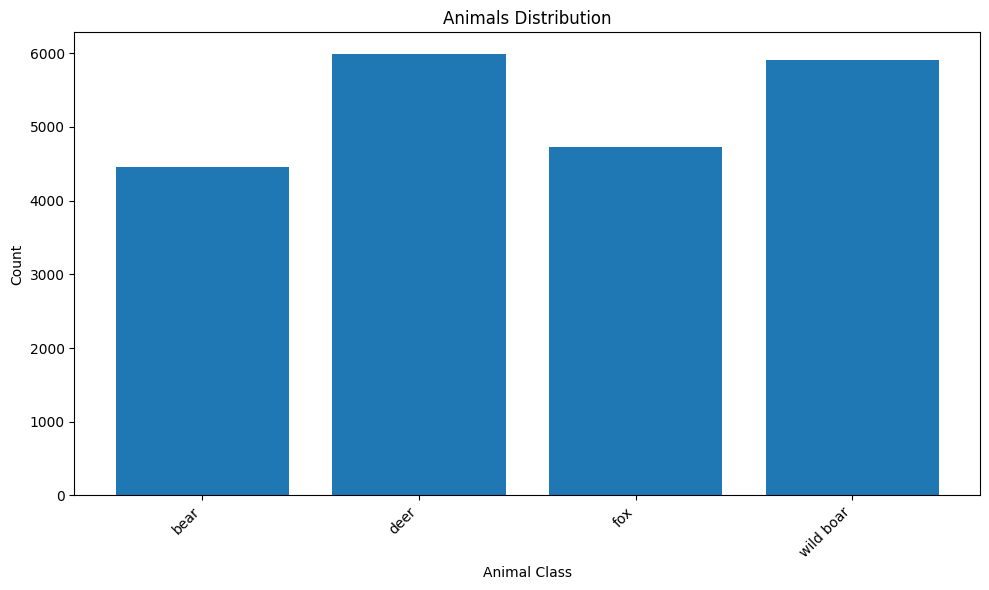

In [11]:
import matplotlib.pyplot as plt
import os

path = "./train"

# Create lists to store animal class labels and counts
animal_labels = []
animal_counts = []

# Populate the lists with data
for o in os.listdir(path):
    animal_labels.append(o)
    animal_counts.append(len(os.listdir(os.path.join(path, o))))

# Create a bar plot to display the distribution
plt.figure(figsize=(10, 6))
plt.bar(animal_labels, animal_counts)
plt.title("Animals Distribution")
plt.xlabel("Animal Class")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")

# Show the plot
plt.tight_layout()
plt.show()


In [13]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input as mobilenet_preprocess_input

# Constants for MobileNet
MOBILENET_WIDTH = 224
MOBILENET_HEIGHT = 224
BATCH_SIZE = 64
test_dir = 'test/'
train_dir = 'train/'
val_dir = 'val/'

In [14]:
# Train Dataset Generator with Augmentation for MobileNet
print("\nTraining Data Set for MobileNet")
train_generator_mobilenet = ImageDataGenerator(preprocessing_function=mobilenet_preprocess_input)
#  preprocessing_function parameter is set to mobilenet_preprocess_input, which is likely a function used to preprocess images specifically for the MobileNet model.

#generates a flow of augmented/processed image data from a directory. It creates a generator named train_flow_mobilenet 

train_flow_mobilenet = train_generator_mobilenet.flow_from_directory(
    train_dir, 
    target_size=(MOBILENET_HEIGHT, MOBILENET_WIDTH),
    batch_size=BATCH_SIZE
)



Training Data Set for MobileNet
Found 21076 images belonging to 4 classes.


In [20]:
# Validation Dataset Generator with Augmentation for MobileNet
print("\nValidation Data Set for MobileNet")
val_generator_mobilenet = ImageDataGenerator(preprocessing_function=mobilenet_preprocess_input)
val_flow_mobilenet = train_generator_mobilenet.flow_from_directory(
    val_dir, 
    target_size=(MOBILENET_HEIGHT, MOBILENET_WIDTH),
    batch_size=BATCH_SIZE
)



Validation Data Set for MobileNet
Found 2291 images belonging to 4 classes.


In [21]:
# Train Dataset Generator with Augmentation for MobileNet
print("\nTest Data Set for MobileNet")
test_generator_mobilenet = ImageDataGenerator(preprocessing_function=mobilenet_preprocess_input)
test_flow_mobilenet = train_generator_mobilenet.flow_from_directory(
    test_dir, 
    target_size=(MOBILENET_HEIGHT, MOBILENET_WIDTH),
    batch_size=BATCH_SIZE
)



Test Data Set for MobileNet
Found 4587 images belonging to 4 classes.


In [ ]:
###Saved Images: You initially augment and save images to address class imbalance. This creates a more balanced dataset by artificially expanding the representation of minority classes.

###Augmentation during Training: Then, during the training process, you employ an ImageDataGenerator with augmentation techniques. This allows for further variation in the data seen by the model during training, even though the images are not saved separately. The preprocessing_function parameter, like mobilenet_preprocess_input, is beneficial for correctly preparing the images for use with a specific neural network architecture.

###By combining these approaches, not only address class imbalance by creating additional data but also provide further diversity to the model during training, enhancing its ability to generalize well to new, unseen data. This comprehensive approach can significantly improve the performance and robustness of your model.

In [19]:
from keras.models import Sequential, Model, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, CSVLogger
from keras import optimizers, models
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras import applications
from keras import backend as K
import tensorflow as tf
import os

# Set the number of parallel execution units
NUM_PARALLEL_EXEC_UNITS = 8
#This line initializes a variable NUM_PARALLEL_EXEC_UNITS to 8, indicating the desired number of CPU cores or threads for parallel execution

# Set Performance Parameters for MKL and Tensorflow using Keras backend
# Configuring TensorFlow Session
# config = tf.compat.v1.ConfigProto(
#     intra_op_parallelism_threads=NUM_PARALLEL_EXEC_UNITS,
#     inter_op_parallelism_threads=1
# )
# session = tf.Session(config=config)
# K.set_session(session)

# Configuring TensorFlow Session
config = tf.compat.v1.ConfigProto(
    intra_op_parallelism_threads=NUM_PARALLEL_EXEC_UNITS,
    inter_op_parallelism_threads=1
)
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

### TensorFlow uses a session to execute operations. Here, we configure TensorFlow to use 8 threads (NUM_PARALLEL_EXEC_UNITS) for intra-operation parallelism (operations within a graph) and 1 thread for inter-operation parallelism (operations between graphs). tf.ConfigProto defines the session configuration, and K.set_session(session) sets this configuration for Keras backend.


###K.set_session(session) sets this configuration for Keras backend.

# Setting MKL and OpenMP Environment Variables:
# MKL and OpenMP
os.environ["OMP_NUM_THREADS"] = str(NUM_PARALLEL_EXEC_UNITS)
os.environ["KMP_BLOCKTIME"] = "1"
os.environ["KMP_SETTINGS"] = "1"
os.environ["KMP_AFFINITY"] = "granularity=fine,verbose,compact,1"


In [23]:
# Initialize mobilenet with transfer learning
### Removing Top Layers (include_top=False): The top layers of a CNN typically involve the final fully connected layers responsible for classification. When include_top=False is used, these classification layers are removed, leaving the convolutional base intact.
base_model = applications.MobileNet (weights='imagenet',
include_top=False,
input_shape=(MOBILENET_WIDTH, MOBILENET_HEIGHT, 3))

17225924/17225924 [==============================] - 8s 0us/step


In [24]:
#add a global spatial average pooling layer
x= base_model.output
x = GlobalAveragePooling2D() (x)
###Global Average Pooling Layer: It reduces the spatial dimensions of the previous layer (output of the pre-trained MobileNet) to a vector by taking the average of each channel. This helps in reducing the total number of parameters and provides a more abstract, condensed representation of the features.
# and a dense layer
x = Dense(1024, activation= 'relu') (x)
predictions = Dense(len(train_flow_mobilenet.class_indices), activation='softmax') (x)

###Dense Layer (ReLU Activation): A fully connected layer with 1024 neurons and ReLU activation function is added. This layer helps in learning high-level features from the abstract representations obtained from previous layers.

###Output Layer: Another Dense layer is added with a number of neurons equal to the number of classes in the training dataset. It uses softmax activation to output class probabilities.
# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions) # The Model() function is used to define the architecture of the overall model by specifying inputs as the input layer of the pre-trained MobileNet (base_model.input) and outputs as the final predictions
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional layers
for layer in base_model.layers:
    layer.trainable = False

In [30]:
# compile the model (should be done after setting layers to non-trainable)
model. compile(optimizer=optimizers.Adam(learning_rate=0.001), metrics=['accuracy', 'top_k_categorical_accuracy'], loss='categorical_crossentropy') 
#  The learning rate is a hyperparameter that determines the step size taken during the optimization process to update the weights of a neural network.
model. summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

### Freezing Layers in Transfer Learning

The reason for explicitly freezing the layers of the `base_model` even though an optimizer with a learning rate is being used is to ensure that only the added layers (top layers) receive updates during training.

When compiling the model with an optimizer and a learning rate, such as using the Adam optimizer in the code:




In [31]:
import math
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, CSVLogger

#top_layers_file_path: Path to save the best model weights.
#ModelCheckpoint: Saves the best model weights based on the lowest loss observed.
#TensorBoard: Logs information for visualization in TensorBoard.
#EarlyStopping: Stops training if loss improvement stalls after a certain number of epochs (patience set to 5).
#CSVLogger: Logs training metrics to a CSV file.
# Callbacks are functions -> to monitor and control the training process. They serve various purposes
top_layers_file_path = "top_layers.mn.hdf5"

checkpoint = ModelCheckpoint(top_layers_file_path, monitor='loss', verbose=1, save_best_only=True, mode='min')
tb = TensorBoard(log_dir='./logs', write_graph=True, update_freq='batch')
early = EarlyStopping(monitor="loss", mode="min", patience=5)
csv_logger = CSVLogger('./logs/mn-log.csv', append=True)



# Assuming `model` is already defined
history = model.fit_generator(train_flow_mobilenet,
                              epochs=3,
                              verbose=1,
                              validation_data=val_flow_mobilenet,
                              validation_steps=math.ceil(val_flow_mobilenet.samples / val_flow_mobilenet.batch_size),
                              steps_per_epoch=math.ceil(train_flow_mobilenet.samples / train_flow_mobilenet.batch_size),
                              callbacks=[checkpoint, early, tb, csv_logger])


C:\Users\Dinuka Thathsara\AppData\Local\Temp\ipykernel_13680\2288966911.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_flow_mobilenet,


Epoch 1/3
330/330 [==============================] - ETA: 0s - loss: 0.1429 - accuracy: 0.9567 - top_k_categorical_accuracy: 1.0000
Epoch 1: loss improved from inf to 0.14285, saving model to top_layers.mn.hdf5


C:\Users\Dinuka Thathsara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


330/330 [==============================] - 1713s 5s/step - loss: 0.1429 - accuracy: 0.9567 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.0723 - val_accuracy: 0.9738 - val_top_k_categorical_accuracy: 1.0000
Epoch 2/3
330/330 [==============================] - ETA: 0s - loss: 0.0243 - accuracy: 0.9920 - top_k_categorical_accuracy: 1.0000
Epoch 2: loss improved from 0.14285 to 0.02429, saving model to top_layers.mn.hdf5
330/330 [==============================] - 1448s 4s/step - loss: 0.0243 - accuracy: 0.9920 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.0238 - val_accuracy: 0.9921 - val_top_k_categorical_accuracy: 1.0000
Epoch 3/3
330/330 [==============================] - ETA: 0s - loss: 0.0128 - accuracy: 0.9963 - top_k_categorical_accuracy: 1.0000
Epoch 3: loss improved from 0.02429 to 0.01275, saving model to top_layers.mn.hdf5
330/330 [==============================] - 1407s 4s/step - loss: 0.0128 - accuracy: 0.9963 - top_k_categorical_accuracy: 1.0000 - val_loss: 0.0412 -

In [32]:
model. load_weights (top_layers_file_path)
loss, acc, top_5 = model. evaluate_generator (
test_flow_mobilenet,
verbose = True,
steps=math.ceil(test_flow_mobilenet.samples/test_flow_mobilenet.batch_size))
print("Loss: ", loss)
print ("ACc: ", acc)
print ("Top 5: ", top_5)

C:\Users\Dinuka Thathsara\AppData\Local\Temp\ipykernel_13680\285157889.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, acc, top_5 = model. evaluate_generator (


72/72 [==============================] - 327s 5s/step - loss: 0.0280 - accuracy: 0.9893 - top_k_categorical_accuracy: 1.0000
Loss:  0.02802862599492073
ACc:  0.9893176555633545
Top 5:  1.0
